# Karhunen Loeve Transform

In [2]:
import numpy as np
import scipy.linalg as lin
from numpy.random import default_rng
import scipy.signal as sig
import scipy.fft as fft

import matplotlib.pyplot as plt

import statsmodels.tsa.stattools as stools
import statsmodels.tsa.arima_process as arima

plt.rcParams["figure.figsize"] = (8,5)
rng = default_rng()

Create a random signal $u$ (white Gaussian noise) and filter it with a moving-average filter. This creates a signal $x$ with a known autocorrelation function.

In [3]:
N = 10
u = rng.standard_normal(N)

<StemContainer object of 3 artists>

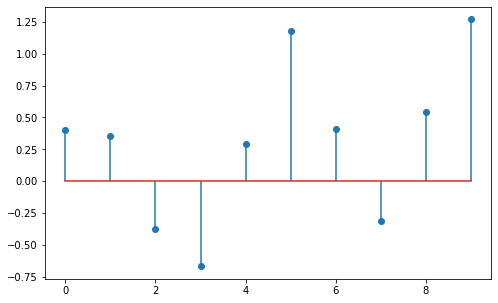

In [22]:
a = [1]
b = np.array([1, 0.8, 0.1])
b = b / lin.norm(b)

x = sig.lfilter(b,a,u)
plt.stem(x)

Now we calculate the analytical solution. The ACF of $y[n]$ is denoted by $r_y[n]$ and is given by

$$
r_y[n] = r_u([n] \star h[n] \star h[-n]
$$

where $r_u[n]$ denotes the ACF of the input signal $u[n]$ of the filter. We have white noise => $r_u[n] = \delta[n]$ and therefore

$$
r_y[n] = h[n] \star h[-n]
$$


In [23]:
brev = b[::-1] # reverse the filter impulse response
acf_x = sig.convolve(b, brev) # and convolve with original
acf_x

array([0.06060606, 0.53333333, 1.        , 0.53333333, 0.06060606])

<StemContainer object of 3 artists>

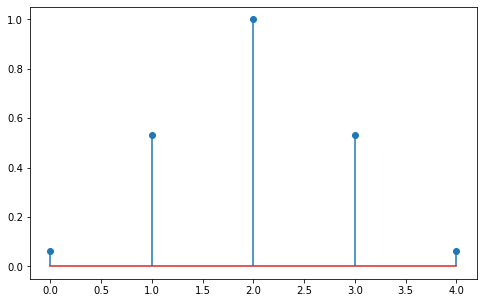

In [24]:
plt.stem(acf_x)

Now we build up the autocorrelation matrix $\Sigma$.

In [25]:
acf_sigma = acf_x[2::]
# acf_sigma
acf_sigma = np.pad(acf_sigma, [0, N-3])
# acf_sigma

Sigma = lin.toeplitz(acf_sigma)
Sigma

array([[1.        , 0.53333333, 0.06060606, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.53333333, 1.        , 0.53333333, 0.06060606, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.06060606, 0.53333333, 1.        , 0.53333333, 0.06060606,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06060606, 0.53333333, 1.        , 0.53333333,
        0.06060606, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.06060606, 0.53333333, 1.        ,
        0.53333333, 0.06060606, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.06060606, 0.53333333,
        1.        , 0.53333333, 0.06060606, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.06060606,
        0.53333333, 1.        , 0.53333333, 0.06060606, 0.        ],
       [0.        , 0.        , 0.       

We calculate the eigendecomposition of the autocorrelation matrix. `v` contains the eigenvectors, `w` the eigenvalues.

In [26]:
w, v = lin.eigh(Sigma)
v

array([[-0.10796098,  0.2111742 , -0.30301579,  0.37509912,  0.41909655,
        -0.42879152, -0.40143826,  0.33828026,  0.24439979, -0.12810308],
       [ 0.22263481, -0.38173003,  0.4283547 , -0.34400592, -0.15100307,
        -0.0909826 , -0.30344278,  0.41577409,  0.38995709, -0.23408584],
       [-0.32048729,  0.42858842, -0.25008414, -0.09721218, -0.37669738,
         0.39411156,  0.13591847,  0.21756013,  0.41757763, -0.32280865],
       [ 0.39105475, -0.33233355, -0.1079318 ,  0.4200621 ,  0.24139828,
         0.21892345,  0.42086565, -0.12701733,  0.31626869, -0.38605877],
       [-0.42795122,  0.12471575,  0.3879463 , -0.23464484,  0.31840557,
        -0.32343253,  0.22620361, -0.3863063 ,  0.11749572, -0.41898284],
       [ 0.42795122,  0.12471575, -0.3879463 , -0.23464484, -0.31840557,
        -0.32343253, -0.22620361, -0.3863063 , -0.11749572, -0.41898284],
       [-0.39105475, -0.33233355,  0.1079318 ,  0.4200621 , -0.24139828,
         0.21892345, -0.42086565, -0.12701733

Project the signal `x` onto the eigenspace; we left-multiply with `v.T`.

In [27]:
kl = v.T @ x
kl

array([ 0.0276231 , -0.01120808, -0.02870664, -0.06932505, -0.85368981,
       -1.60214211, -0.25636334,  0.25364134, -0.7542995 , -0.71992191])

Now let's plot the coefficients of the KL transform. I would have expected them to fall off quicker, but anyway...

<StemContainer object of 3 artists>

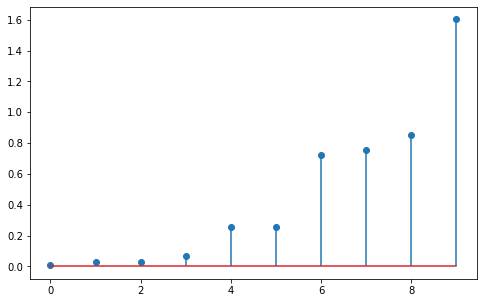

In [28]:
plt.stem(np.sort(np.abs(kl)))

Just to check - when we left-multiply with `v`, we get the original signal: `v v.T x = x`. 

In [29]:
v @ kl

array([ 0.40314171,  0.35428495, -0.37182204, -0.66906175,  0.29531066,
        1.17810033,  0.40820743, -0.31199371,  0.54146458,  1.2701391 ])

In [30]:
x

array([ 0.40314171,  0.35428495, -0.37182204, -0.66906175,  0.29531066,
        1.17810033,  0.40820743, -0.31199371,  0.54146458,  1.2701391 ])

In [31]:
dct_x = fft.dct(x, norm='ortho')

<StemContainer object of 3 artists>

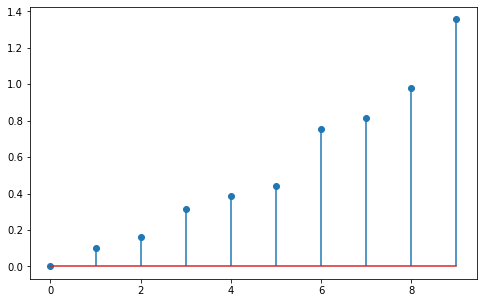

In [32]:
plt.stem(np.sort(np.abs(dct_x)))